<a href="https://colab.research.google.com/github/mernaadell/Computer-Vision/blob/master/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merna.jpg to merna.jpg


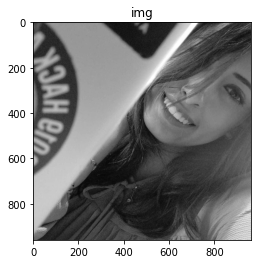

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image
img = cv2.imread("merna.jpg", 0)
plt.imshow(img, cmap='gray')
plt.title("img")
plt.show()

In [0]:
import imageio
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos



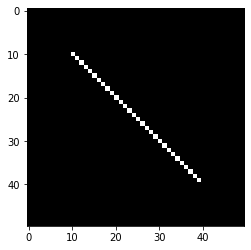

In [43]:

image = np.zeros((50,50))
image[10:40, 10:40] = np.eye(30)
accumulator, thetas, rhos = hough_line(image)
plt.imshow(image,cmap='gray')
plt.show()


In [0]:
def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

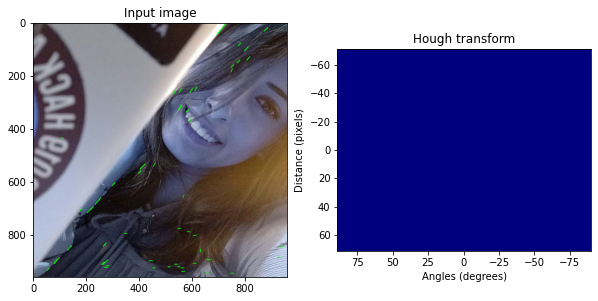

In [52]:
show_hough_line(img, accumulator ,thetas, rhos)

In [0]:

def peak_votes(accumulator, thetas, rhos):
    """ Finds the max number of votes in the hough accumulator """
    idx = np.argmax(accumulator)
    rho = rhos[int(idx / accumulator.shape[1])]
    theta = thetas[idx % accumulator.shape[1]]

    return idx, theta, rho

def theta2gradient(theta):
    return np.cos(theta) / np.sin(theta)


def rho2intercept(theta, rho):
    return rho / np.sin(theta)

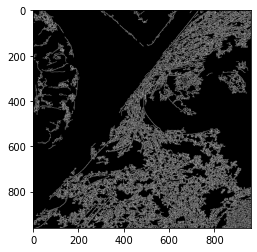

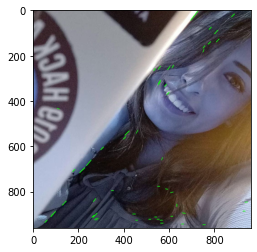

In [54]:
import cv2
import numpy as np

img = cv2.imread('merna.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 150, apertureSize=3)
#now i have biar image

plt.imshow(edges,cmap='gray')
plt.show()
cv2.waitKey(0)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength, maxLineGap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imwrite('houghlines5.jpg', img)

new = cv2.imread('houghlines5.jpg')
plt.imshow(new)
plt.show()


In [0]:
import unittest
import numpy as np



def generate_line_points(m, im_len):
    """ Generate test line points on an image where origin is top left """
    run = int(im_len / abs(m))
    rise = run * abs(m)

    x_points = np.arange(0, run + 0).astype(np.uint8)
    start = rise - 1
    end = 0
    if m < 0:
        end = start
        start = 0
    y_points = np.linspace(start, end, len(x_points)).astype(np.uint8)

    return x_points, y_points


def plot_image(img):
    import matplotlib.pyplot as plt

    plt.figure()
    plt.imshow(img)
    plt.axis('equal')
    plt.show()


class TestHoughLine(unittest.TestCase):
    def test_negative_gradient(self):
        im_len = 100
        gradient = -3.3
        x_points, y_points = generate_line_points(m=gradient, im_len=im_len)

        img = np.zeros((im_len, im_len), dtype=np.uint8)
        img[y_points, x_points] = 255

        accumulator, thetas, rhos = hough_transform.hough_line(img)
        idx, theta, rho = processor.peak_votes(accumulator, thetas, rhos)

        self.assertEqual(idx, 25453)
        self.assertTrue(np.isclose(
            processor.theta2gradient(theta), gradient, 1e-2))
        self.assertTrue(np.isclose(
            processor.rho2intercept(theta, rho), -1.71624))

        # print("idx={}, rho={:.2f}, theta={:.0f} gradient={:.2f} intercept={:.5f}".format(
        #     idx, rho, np.rad2deg(theta), processor.theta2gradient(theta), processor.rho2intercept(theta, rho)))

    def test_positive_gradient(self):
        im_len = 80
        gradient = 5.1
        x_points, y_points = generate_line_points(m=gradient, im_len=im_len)

        img = np.zeros((im_len, im_len), dtype=np.uint8)
        img[y_points, x_points] = 255

        accumulator, thetas, rhos = hough_transform.hough_line(img)
        idx, theta, rho = processor.peak_votes(accumulator, thetas, rhos)

        self.assertEqual(idx, 22961)
        self.assertTrue(np.isclose(
            processor.theta2gradient(theta), gradient, 1e-2))
        self.assertTrue(np.isclose(
            processor.rho2intercept(theta, rho), y_points[0], 0.1))

    def test_vertical_line(self):
        img = np.zeros((31, 31), dtype=np.uint8)
        img[1, 15] = 255
        img[5, 15] = 255
        img[10, 15] = 255
        img[15, 15] = 255
        img[20, 15] = 255
        img[25, 15] = 255
        img[30, 15] = 255

        accumulator, thetas, rhos = hough_transform.hough_line(img)
        idx, theta, rho = processor.peak_votes(accumulator, thetas, rhos)

        self.assertEqual(idx, 10710)
        self.assertEqual(round(rho), 16)
        self.assertEqual(theta, 0)

